In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import BoundaryNorm
from scipy.stats import linregress, pearsonr
import pandas as pd

# Look at the land cover

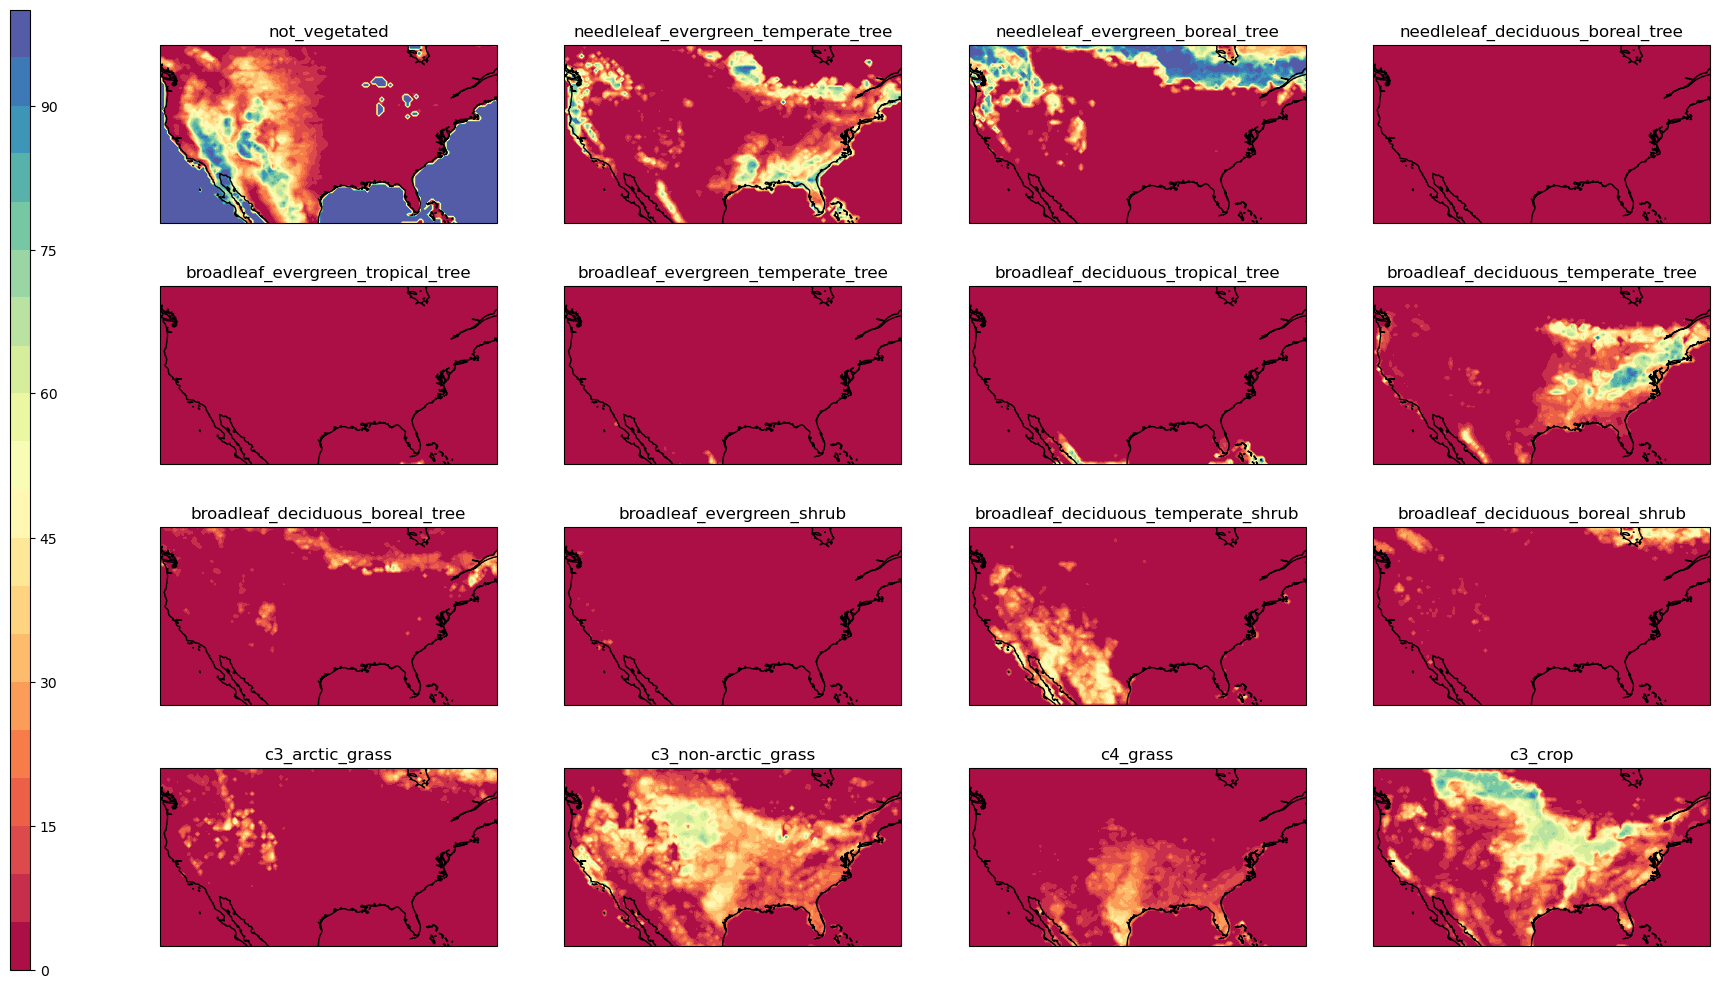

In [2]:
#
pft_list =  {0: 'not_vegetated', 
             1: 'needleleaf_evergreen_temperate_tree', 
             2: 'needleleaf_evergreen_boreal_tree', 
             3: 'needleleaf_deciduous_boreal_tree', 
             4: 'broadleaf_evergreen_tropical_tree', 
             5: 'broadleaf_evergreen_temperate_tree', 
             6: 'broadleaf_deciduous_tropical_tree', 
             7: 'broadleaf_deciduous_temperate_tree', 
             8: 'broadleaf_deciduous_boreal_tree', 
             9: 'broadleaf_evergreen_shrub', 
            10: 'broadleaf_deciduous_temperate_shrub', 
            11: 'broadleaf_deciduous_boreal_shrub', 
            12: 'c3_arctic_grass', 
            13: 'c3_non-arctic_grass', 
            14: 'c4_grass', 
            15: 'c3_crop', 
            16: 'c3_irrigated'}

# Check the input land cover files
path_luc = os.path.join(os.environ['PROJDIR'], 'E3SM', 'inputdata', 'lnd', 'clm2', 
                        'surfdata_map', 
                        'landuse.timeseries_conus_erw_off_hist_simyr1850_c240712.nc')
hr = xr.open_dataset(path_luc)

# 2015 values
fig, axes = plt.subplots(4, 4, figsize = (20, 12), sharex = True, sharey = True,
                         subplot_kw = {'projection': ccrs.PlateCarree()})
for i in range(16):
    ax = axes.flat[i]
    ax.coastlines()
    cf = ax.contourf(hr['LONGXY'][0, :], hr['LATIXY'][:,0], hr['PCT_NAT_PFT'][-1, i, :, :],
                     levels = np.linspace(0, 100, 21), cmap = 'Spectral')
    ax.set_title(pft_list[i])
cax = fig.add_axes([0.05, 0.1, 0.01, 0.8])
plt.colorbar(cf, cax = cax, orientation = 'vertical')

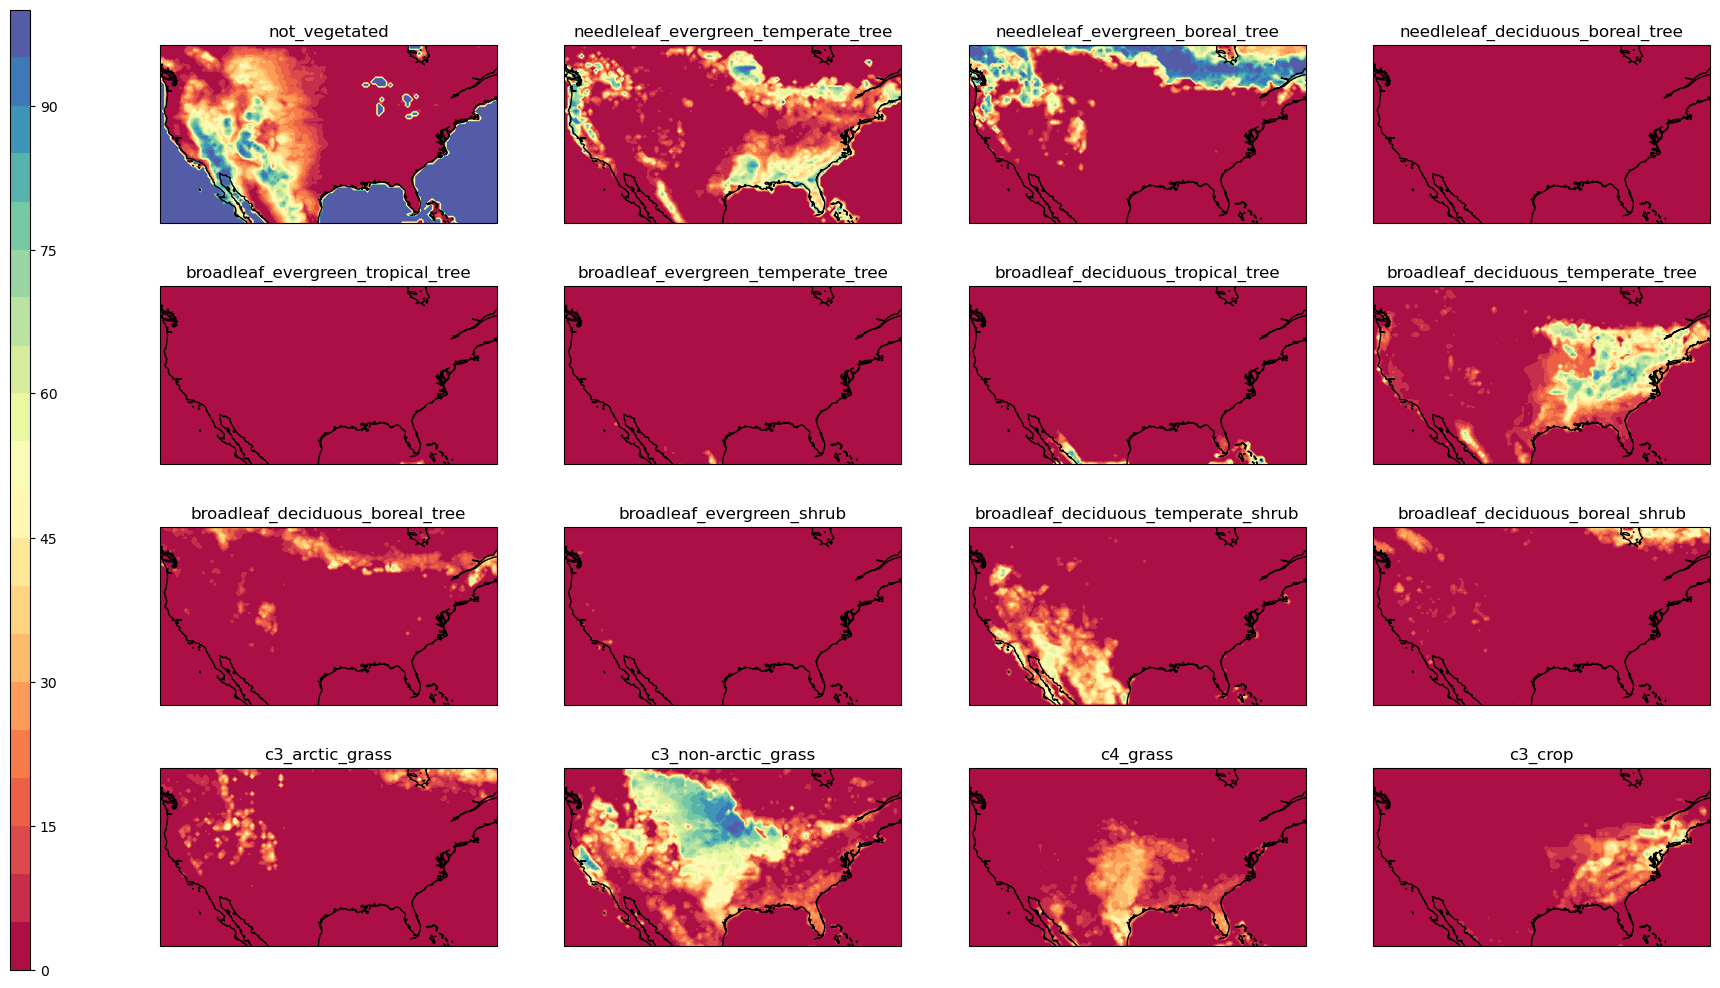

In [3]:
# Check the static surfdata
path_luc = os.path.join(os.environ['PROJDIR'], 'E3SM', 'inputdata', 'lnd', 'clm2', 
                        'surfdata_map', 
                        'surfdata_conus_erw_off_simyr1850_c211019.nc')
hr = xr.open_dataset(path_luc)

# 2015 values
fig, axes = plt.subplots(4, 4, figsize = (20, 12), sharex = True, sharey = True,
                         subplot_kw = {'projection': ccrs.PlateCarree()})
for i in range(16):
    ax = axes.flat[i]
    ax.coastlines()
    cf = ax.contourf(hr['LONGXY'][0, :], hr['LATIXY'][:,0], hr['PCT_NAT_PFT'][i, :, :],
                     levels = np.linspace(0, 100, 21), cmap = 'Spectral')
    ax.set_title(pft_list[i])
cax = fig.add_axes([0.05, 0.1, 0.01, 0.8])
plt.colorbar(cf, cax = cax, orientation = 'vertical')

# Check the simulated values in general

In [2]:
flist = [os.path.join(os.environ['PROJDIR'], 'E3SM', 'output', 
                      'ERW_off_hcru_hcru_ICB20TRCNPRDCTCBC', 'run', 
                      f'ERW_off_hcru_hcru_ICB20TRCNPRDCTCBC.elm.h1.{year}-01-01-00000.nc') \
         for year in range(1990, 2010)]
hr = xr.open_mfdataset(flist)
#filename = os.path.join(os.environ['PROJDIR'], 'E3SM', 'output', 
#                        'ERW_ctrl_hcru_hcru_ICB1850CNRDCTCBC_ad_spinup', 'run', 
#                        'ERW_ctrl_hcru_hcru_ICB1850CNRDCTCBC_ad_spinup.elm.h0.0201-01-01-00000.nc')
#hr = xr.open_dataset(filename)
#filename = os.path.join(os.environ['PROJDIR'],'E3SM','output', 
#                                   'ERW_off_hcru_hcru_ICB20TRCNPRDCTCBC', 'run', 
#                            'ERW_off_hcru_hcru_ICB20TRCNPRDCTCBC.elm.h1.1851-01-01-00000.nc')
#hr = xr.open_dataset(filename)

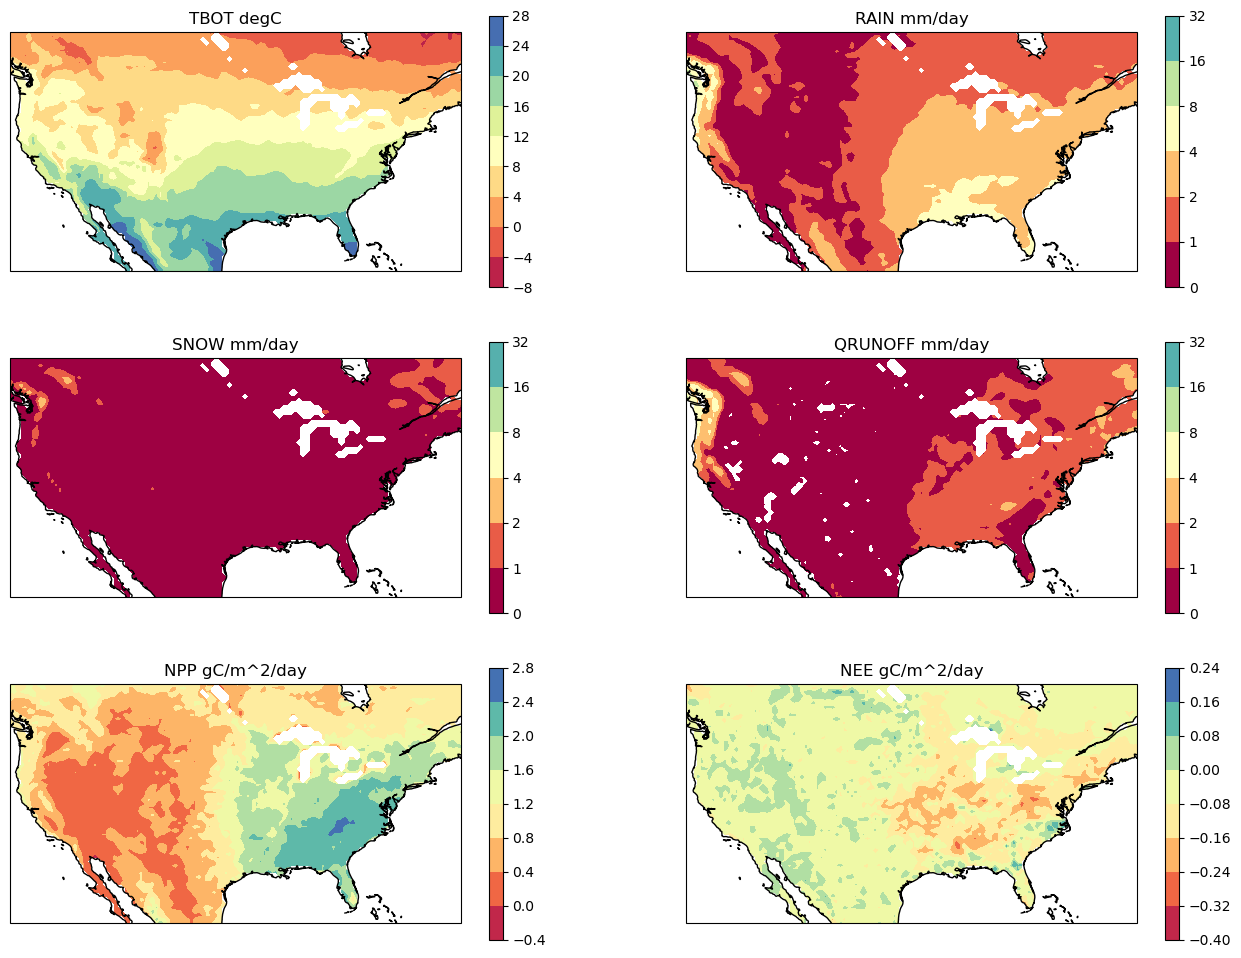

In [5]:
fig, axes = plt.subplots(3, 2, figsize = (16, 12), subplot_kw = {'projection': ccrs.PlateCarree()})

for i, var in enumerate(['TBOT', 'RAIN', 'SNOW', 'QRUNOFF', 'NPP', 'NEE']):
    ax = axes.flat[i]
    ax.coastlines()
    if var != 'TBOT':
        data = hr[var].mean(axis = 0) * 86400
    else:
        data = hr[var].mean(axis = 0) - 273.15
    if var in ['RAIN', 'SNOW', 'QRUNOFF']:
        norm = BoundaryNorm([0, 1, 2, 4, 8, 16, 32], ncolors=256, extend='max')
        cf = ax.contourf(hr['lon'], hr['lat'], data, cmap = 'Spectral',
                         norm = norm, levels = [0, 1, 2, 4, 8, 16, 32])
        plt.colorbar(cf, ax = ax)
    else:
        cf = ax.contourf(hr['lon'], hr['lat'], data, cmap = 'Spectral')
        plt.colorbar(cf, ax = ax)
    ax.set_title(var + ' ' + hr[var].attrs['units'].replace('s','day').replace('K','degC'))

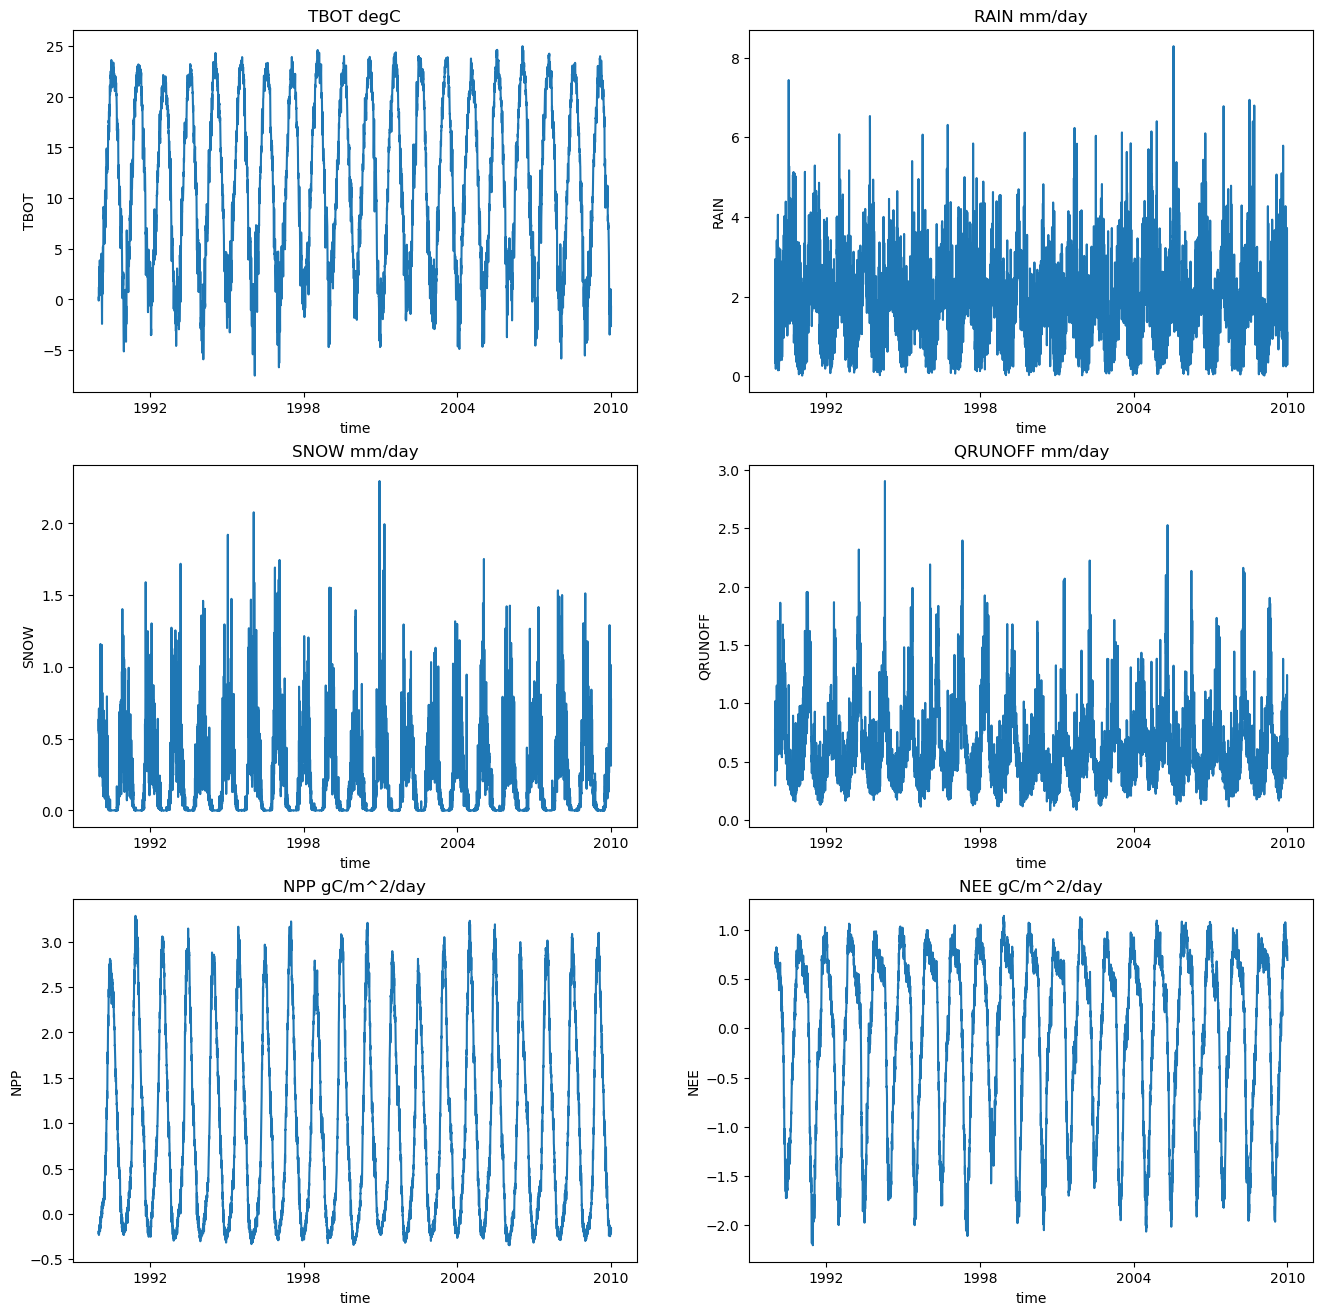

In [6]:
# Plot regional trajectories
fig, axes = plt.subplots(3, 2, figsize = (16, 16))
for i, var in enumerate(['TBOT', 'RAIN', 'SNOW', 'QRUNOFF', 'NPP', 'NEE']):
    ax = axes.flat[i]
    if var != 'TBOT':
        data = hr[var].mean(axis=2).mean(axis=1) * 86400
    else:
        data = hr[var].mean(axis=2).mean(axis=1) - 273.15
    data.plot(ax = ax)
    ax.set_title(var + ' ' + hr[var].attrs['units'].replace('s','day').replace('K','degC'))

# Compare against observed runoff

/ccsopen/home/ywo/.conda/envs/myCondaEnv/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shrink'
  result = super().contourf(*args, **kwargs)


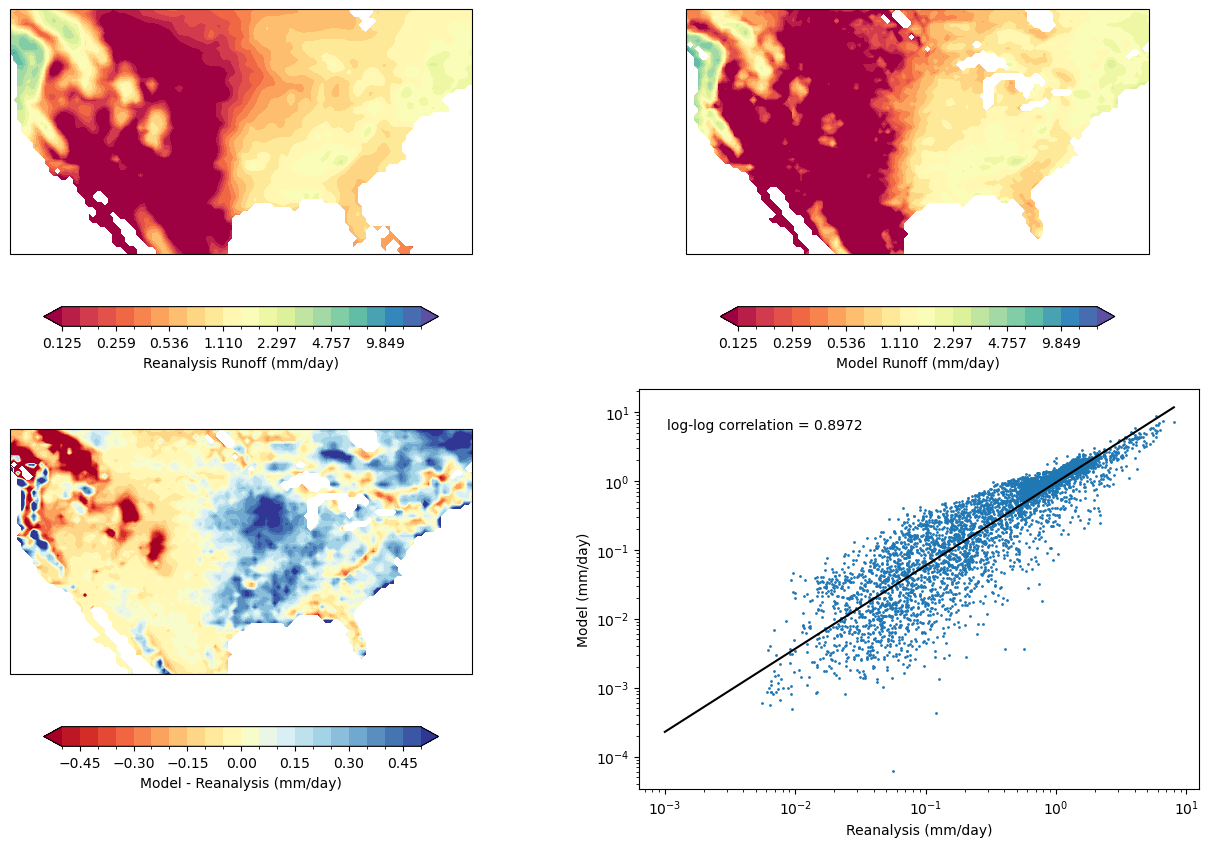

In [7]:
grun = xr.open_dataset(os.path.join(os.environ['PROJDIR'], 'ERW_LDRD', 'data', 'GRUN',
                                    'G-RUN_ENSEMBLE_MMM_CONUS.nc'))

fig, axes = plt.subplots(2, 2, figsize = (16, 10), subplot_kw = {'projection': ccrs.PlateCarree()})

levels = 2**np.linspace(-3, 4, 21)
norm = BoundaryNorm(levels, ncolors=256, extend='both')

ax = axes.flat[0]
data = grun['Runoff'].mean(axis = 0)
cf = ax.contourf(grun['lon'], grun['lat'], data, cmap = 'Spectral',
                 norm = norm, levels = levels, extend = 'both')
plt.colorbar(cf, ax = ax, label = 'Reanalysis Runoff (mm/day)', 
             orientation = 'horizontal', shrink = 0.7)

ax = axes.flat[1]
data2 = hr['QRUNOFF'].mean(axis = 0) * 86400
cf = ax.contourf(grun['lon'], grun['lat'], data2,
                 cmap = 'Spectral', norm = norm, levels = levels, extend = 'both')
plt.colorbar(cf, ax = ax, label = 'Model Runoff (mm/day)', 
             orientation = 'horizontal', shrink = 0.7)


levels = np.linspace(-0.5, 0.5, 21)
norm = BoundaryNorm(levels, ncolors=256, extend='both')

ax = axes.flat[2]
cf = ax.contourf(grun['lon'], grun['lat'], data2 - data.values,
                 cmap = 'RdYlBu', norm = norm, levels = levels, extend = 'both', 
                 shrink = 0.7)
plt.colorbar(cf, ax = ax, label = 'Model - Reanalysis (mm/day)', 
             orientation = 'horizontal', shrink = 0.7)

axes.flat[-1].axis('off')

cax = fig.add_axes([0.55, 0.1, 0.35, 0.4])

x = data.values.reshape(-1)
y = data2.values.reshape(-1)
filt = (x > 0) & (y > 0) # ELM runoff has tiny negative values!
x = x[filt]
y = y[filt]

cax.plot(x, y, 'o', markersize = 1)
cax.set_xlabel('Reanalysis (mm/day)')
cax.set_ylabel('Model (mm/day)')
cax.set_xscale('log')
cax.set_yscale('log')

res = linregress(np.log(x), np.log(y))
cax.plot([1e-3, 8], [np.exp(np.log(1e-3)*res.slope+res.intercept), 
                  np.exp(np.log(8)*res.slope+res.intercept)], '-k')
rho, pval = pearsonr(np.log(x), np.log(y))
cax.text(0.05, 0.9, f'log-log correlation = {rho:.04f}', transform = cax.transAxes)

grun.close()

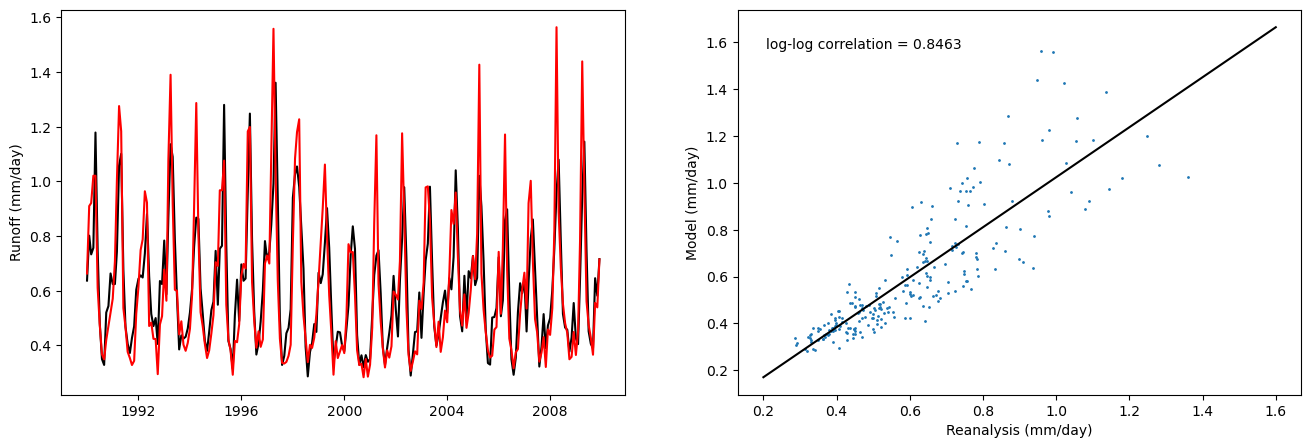

In [12]:
grun = xr.open_dataset(os.path.join(os.environ['PROJDIR'], 'ERW_LDRD', 'data', 'GRUN',
                                    'G-RUN_ENSEMBLE_MMM_CONUS.nc'))

fig, axes = plt.subplots(1, 2, figsize = (16, 5))

data = grun['Runoff'].mean(axis = 2).mean(axis = 1)
data2 = hr['QRUNOFF'].mean(axis = 2).mean(axis = 1).resample(time='1M').mean() * 86400

ax = axes.flat[0]
ax.plot(data['time'].to_index(), data.values, '-k', label = 'Reanalysis')
ax.plot(data['time'].to_index(), data2.values, '-r', label = 'Model')
ax.set_ylabel('Runoff (mm/day)')

ax = axes.flat[1]
ax.plot(data.values, data2.values, 'o', markersize = 1)
ax.set_xlabel('Reanalysis (mm/day)')
ax.set_ylabel('Model (mm/day)')

res = linregress(data.values, data2.values)
ax.plot([0.2, 1.6], [0.2*res.slope+res.intercept, 1.6*res.slope+res.intercept], '-k')
rho, pval = pearsonr(data.values, data2.values)
ax.text(0.05, 0.9, f'log-log correlation = {rho:.04f}', transform = ax.transAxes)

grun.close()

# Compare against observed LAI

In [13]:
modis = xr.open_dataset(os.path.join(os.environ['PROJDIR'], 'ERW_LDRD', 'data', 'ILAMB',
                                     'MODIS_lai_0.5x0.5.nc'))

time_slice = slice('2000-01-01', '2005-12-31')  # Replace with your desired time range
bounding_box = {'lon': slice(-125.25, -66.5), 'lat': slice(23.25, 54.7)}
lai_obs = modis['lai'].sel(lat = bounding_box['lat'], lon = bounding_box['lon']).load()

lai_sim = hr['TLAI'].sel(time=time_slice).resample(time='1M').mean().load()

/ccsopen/home/ywo/.conda/envs/myCondaEnv/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'lai' has multiple fill values {1e+36, -999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


/ccsopen/home/ywo/.conda/envs/myCondaEnv/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shrink'
  result = super().contourf(*args, **kwargs)


Text(0.05, 0.9, 'correlation = 0.7744')

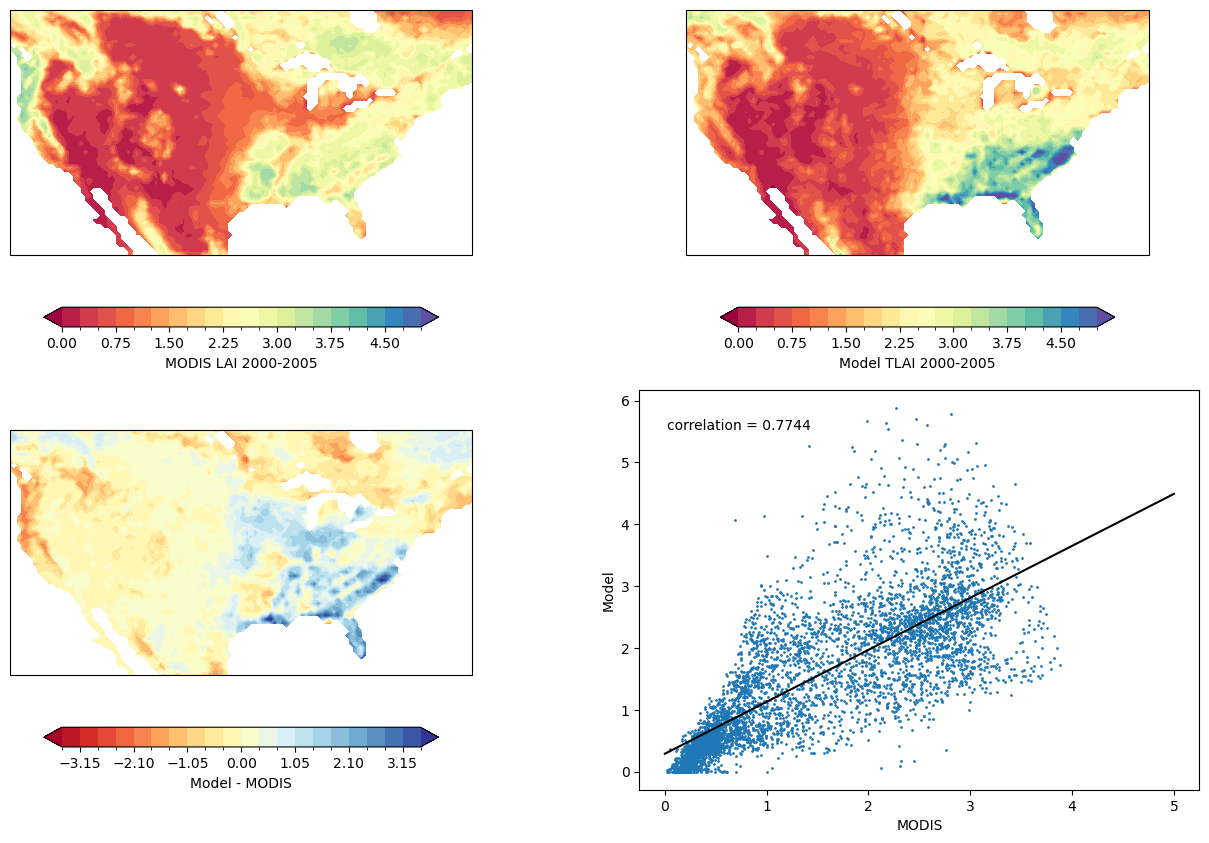

In [15]:
fig, axes = plt.subplots(2, 2, figsize = (16, 10), subplot_kw = {'projection': ccrs.PlateCarree()})

levels = np.linspace(0, 5, 21)
norm = BoundaryNorm(levels, ncolors=256, extend='both')

ax = axes.flat[0]
data = lai_obs.mean(axis = 0)
cf = ax.contourf(data['lon'], data['lat'], data, cmap = 'Spectral',
                 norm = norm, levels = levels, extend = 'both')
plt.colorbar(cf, ax = ax, label = 'MODIS LAI 2000-2005', 
             orientation = 'horizontal', shrink = 0.7)

ax = axes.flat[1]
data2 = lai_sim.mean(axis = 0)
cf = ax.contourf(data2['lon'], data2['lat'], data2,
                 cmap = 'Spectral', norm = norm, levels = levels, extend = 'both')
plt.colorbar(cf, ax = ax, label = 'Model TLAI 2000-2005', 
             orientation = 'horizontal', shrink = 0.7)

levels = np.linspace(-3.5, 3.5, 21)
norm = BoundaryNorm(levels, ncolors=256, extend='both')

ax = axes.flat[2]
cf = ax.contourf(data2['lon'], data2['lat'], data2 - data.values,
                 cmap = 'RdYlBu', norm = norm, levels = levels, extend = 'both', 
                 shrink = 0.7)
plt.colorbar(cf, ax = ax, label = 'Model - MODIS', 
             orientation = 'horizontal', shrink = 0.7)

axes.flat[-1].axis('off')

cax = fig.add_axes([0.55, 0.1, 0.35, 0.4])

x = data.values.reshape(-1)
y = data2.values.reshape(-1)
filt = (x > 0) & (y > 0) # ELM runoff has tiny negative values!
x = x[filt]
y = y[filt]

cax.plot(x, y, 'o', markersize = 1)
cax.set_xlabel('MODIS')
cax.set_ylabel('Model')

res = linregress(x, y)
cax.plot([0, 5], [0*res.slope+res.intercept, 5*res.slope+res.intercept], '-k')
rho, pval = pearsonr(x, y)
cax.text(0.05, 0.9, f'correlation = {rho:.04f}', transform = cax.transAxes)

Text(0.05, 0.9, 'log-log correlation = 0.9214')

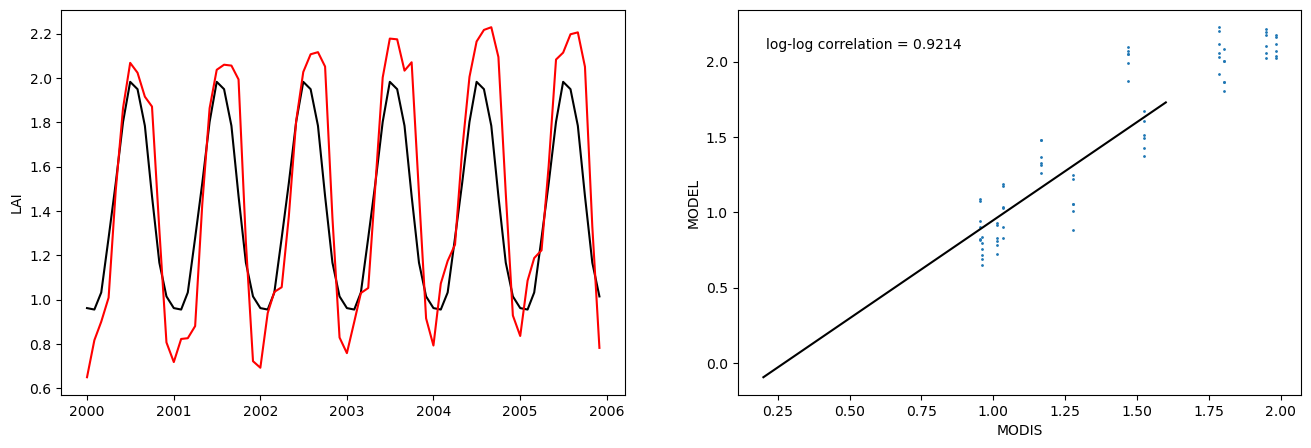

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5))

data = lai_obs.mean(axis = 2).mean(axis = 1)
data2 = lai_sim.mean(axis = 2).mean(axis = 1)

ax = axes.flat[0]
ax.plot(pd.date_range('2000-01-01', '2005-12-31', freq = '1MS'), data.values, '-k', label = 'MODIS')
ax.plot(pd.date_range('2000-01-01', '2005-12-31', freq = '1MS'), data2.values, '-r', label = 'Model')
ax.set_ylabel('LAI')

ax = axes.flat[1]
ax.plot(data.values, data2.values, 'o', markersize = 1)
ax.set_xlabel('MODIS')
ax.set_ylabel('MODEL')

res = linregress(data.values, data2.values)
ax.plot([0.2, 1.6], [0.2*res.slope+res.intercept, 1.6*res.slope+res.intercept], '-k')
rho, pval = pearsonr(data.values, data2.values)
ax.text(0.05, 0.9, f'correlation = {rho:.04f}', transform = ax.transAxes)

In [ ]:
modis.close()

In [ ]:
hr.close()